### 📌This is Exercise problem 3

From given titanic dataset, create a model to predict if a passenger can survive titanic shipwreck  
Build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).



In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [230]:
# Import the dataset

data = pd.read_csv("dataset/titanic/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [232]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Handle missing values

'Cabin'

In [233]:
data.drop('Cabin',axis=1,inplace=True)

'Age'

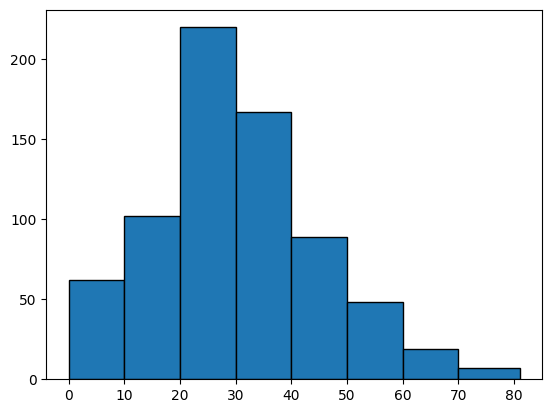

In [234]:
plt.hist(data['Age'],edgecolor='k',bins=[0,10,20,30,40,50,60,70,81])
plt.show()

Majority of ages are coming in range of 20-40  
So im giving missing instance any random value from this range

In [235]:
range_age = range(20,40)
data['Age'] = data['Age'].apply(lambda x: np.random.choice(range_age) if pd.isna(x) else x)


## Note: initially i use "x==np.nan" but it didnot work, why? because LHS = NaN, RHS = NaN
# But Nan is never equal to Nan (even itself)

In [236]:
data['Age'].isnull().sum()

np.int64(0)

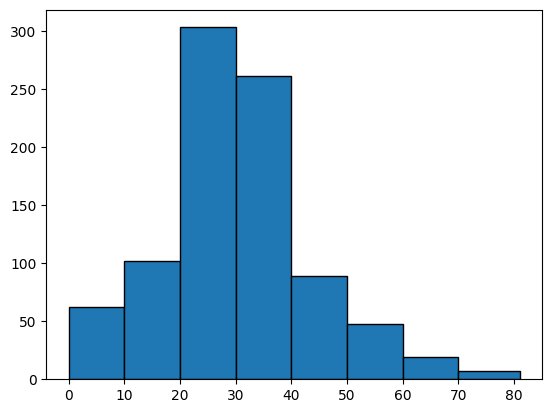

In [237]:
plt.hist(data['Age'],edgecolor='k',bins=[0,10,20,30,40,50,60,70,81])
plt.show()

Graph is still almost the same...  
Maybe we did the right thing

'Embarked'

In [238]:
data['Embarked'].value_counts()

# We have only two missing values, lets just use mode imputation

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [239]:
mode = data['Embarked'].mode()
mode[0]

'S'

In [240]:
mode = data['Embarked'].mode()
print(mode[0])
data.fillna({'Embarked':mode[0]},inplace=True)   # This syntax is according to warning 

S


In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Dealed with all the missing values

### Feature engineering

In [242]:
# We dont really need 'Name and PassengerId' to provide to machines
data.drop(['Name','PassengerId','Ticket'],axis=1,inplace=True)

In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### Encoding

In [244]:
## Sex
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [245]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

data_encoded = encoder.fit_transform(data[['Sex','Embarked']]).toarray()

In [246]:
data_encoded_df = pd.DataFrame(data_encoded,columns=encoder.get_feature_names_out())
data_encoded_df

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0
887,1.0,0.0,0.0,0.0,1.0
888,1.0,0.0,0.0,0.0,1.0
889,0.0,1.0,1.0,0.0,0.0


In [247]:
data = pd.concat([data,data_encoded_df],axis=1)
data.drop(['Sex','Embarked'],axis=1,inplace=True)

In [248]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0.0,1.0,0.0,0.0,1.0
887,1,1,19.0,0,0,30.0000,1.0,0.0,0.0,0.0,1.0
888,0,3,21.0,1,2,23.4500,1.0,0.0,0.0,0.0,1.0
889,1,1,26.0,0,0,30.0000,0.0,1.0,1.0,0.0,0.0


### Data analysis

In [251]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.078251,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.149683
Pclass,-0.338481,1.000000,-0.317700,0.083081,0.018443,-0.549500,-0.131900,0.131900,-0.243292,0.221009,0.074053
Age,-0.078251,-0.317700,1.000000,-0.218934,-0.173859,0.085440,-0.085836,0.085836,0.032467,-0.008826,-0.022889
SibSp,-0.035322,0.083081,-0.218934,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,-0.026354,0.068734
Parch,0.081629,0.018443,-0.173859,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,-0.081228,0.060814
Fare,0.257307,-0.549500,0.085440,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.162184
Sex_female,0.543351,-0.131900,-0.085836,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.119224
Sex_male,-0.543351,0.131900,0.085836,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.119224
Embarked_C,0.168240,-0.243292,0.032467,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.782742
Embarked_Q,0.003650,0.221009,-0.008826,-0.026354,-0.081228,-0.117216,0.074115,-0.074115,-0.148258,1.000000,-0.499421
